In [339]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [340]:
# Shared functions

In [341]:
def convert_to_boolean_labels(labels):
    return np.where(labels >= 0.5, True, False)

In [342]:
def scatterplot(results, model_1, model_2, y_label, ylim=(0.8, 1.0)):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(111)
    #bar_width = 0.35
    point_size=15
    for i, (_index, row) in enumerate(results.iterrows()):
        # For each subgroup, we plot a 1D scatterplot. The x-value is the position
        # of the item in the dataframe. To change the ordering of the subgroups,
        # sort the dataframe before passing to this function.
        x = [i] * 2
        y = [row[model_1], row[model_2]]
        ax.scatter(x, y, s=0)
        #if (abs(y[1] - y[0]) > 0.003):
        plt.arrow(x[0],y[0], 0, y[1] - y[0], length_includes_head=True, shape='full', head_starts_at_zero=False, head_length=0.005, head_width=0.3, color='black')
    ax.set_xticklabels(results['subgroup'], rotation=90)
    ax.set_xticks(range(len(results)))
    ax.set_ylim(ylim)
    ax.set_title(y_label)
    fig.tight_layout()
    #fig.savefig('/tmp/%s_%s.eps' % (file_name, values_col), format='eps')

In [343]:
# MADLIBS set up

In [344]:
model_families = [
    ['Rock:TOXICITY'],#, 'wiki_cnn_v3_101', 'wiki_cnn_v3_102'],
    ['RockV5_1:TOXICITY'],# 'wiki_debias_cnn_v3_101', 'wiki_debias_cnn_v3_102'],
    ['RockV6_1:TOXICITY'],
]

In [345]:
madlibs = pd.read_csv('eval_datasets/bias_madlibs_77k_scored_prod_models.csv')

In [346]:
# Add columns for each subgroup.
f = open('bias_madlibs_data/adjectives_people.txt', 'r')
terms = [line.strip() for line in f]
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'Text', terms)

In [347]:
madlibs['label_bool'] = madlibs.apply(lambda row: row.Label == 'BAD', axis=1)

In [348]:
madlibs_results = model_bias_analysis.per_subgroup_aucs(madlibs, terms, model_families, 'label_bool')

In [349]:
madlibs_results['TOXICITY_V1_pinned_auc'] = madlibs_results.apply(lambda row: row['Rock:TOXICITY_aucs'][0], axis=1)
madlibs_results['TOXICITY_V5_pinned_auc'] = madlibs_results.apply(lambda row: row['RockV5_1:TOXICITY_aucs'][0], axis=1)
madlibs_results['TOXICITY_V6_pinned_auc'] = madlibs_results.apply(lambda row: row['RockV6_1:TOXICITY_aucs'][0], axis=1)

madlibs_results['TOXICITY_V1_weighted_pinned_auc'] = madlibs_results.apply(lambda row: row['Rock:TOXICITY_normalized_pinned_aucs'][0], axis=1)
madlibs_results['TOXICITY_V5_weighted_pinned_auc'] = madlibs_results.apply(lambda row: row['RockV5_1:TOXICITY_normalized_pinned_aucs'][0], axis=1)
madlibs_results['TOXICITY_V6_weighted_pinned_auc'] = madlibs_results.apply(lambda row: row['RockV6_1:TOXICITY_normalized_pinned_aucs'][0], axis=1)

madlibs_results['TOXICITY_V1_negative_aeg'] = madlibs_results.apply(lambda row: row['Rock:TOXICITY_within_negative_label_mwus'][0], axis=1)
madlibs_results['TOXICITY_V5_negative_aeg'] = madlibs_results.apply(lambda row: row['RockV5_1:TOXICITY_within_negative_label_mwus'][0], axis=1)
madlibs_results['TOXICITY_V6_negative_aeg'] = madlibs_results.apply(lambda row: row['RockV6_1:TOXICITY_within_negative_label_mwus'][0], axis=1)

madlibs_results['TOXICITY_V1_positive_aeg'] = madlibs_results.apply(lambda row: row['Rock:TOXICITY_within_positive_label_mwus'][0], axis=1)
madlibs_results['TOXICITY_V5_positive_aeg'] = madlibs_results.apply(lambda row: row['RockV5_1:TOXICITY_within_positive_label_mwus'][0], axis=1)
madlibs_results['TOXICITY_V6_positive_aeg'] = madlibs_results.apply(lambda row: row['RockV6_1:TOXICITY_within_positive_label_mwus'][0], axis=1)

In [350]:
# Real Data set up 

In [351]:
human_labels = [
 'toxicity',
 'severe_toxicity',
 'obscene',
 'sexual_explicit',
 'identity_attack',
 'insult',
 'threat',
 'male',
 'female',
 'transgender',
 'other_gender',
 'heterosexual',
 'homosexual_gay_or_lesbian',
 'bisexual',
 'other_sexual_orientation',
 'christian',
 'jewish',
 'muslim',
 'hindu',
 'buddhist',
 'atheist',
 'other_religion',
 'black',
 'white',
 'asian',
 'latino',
 'other_race_or_ethnicity',
 'physical_disability',
 'intellectual_or_learning_disability',
 'psychiatric_or_mental_illness',
 'other_disability']

identities = [
 'male',
 'female',
 'transgender',
 'heterosexual',
 'homosexual_gay_or_lesbian',
 'bisexual',
 'christian',
 'jewish',
 'muslim',
 'hindu',
 'buddhist',
 'atheist',
 'other_religion',
 'black',
 'white',
 'asian',
 'latino',
 'other_race_or_ethnicity',
 'physical_disability',
 'intellectual_or_learning_disability',
 'psychiatric_or_mental_illness']

In [352]:
real_data = pd.read_csv('eval_datasets/identity_labeled_scored.csv')

In [353]:
real_data_model_families = [
    ['rock_toxicity'],#, 'wiki_cnn_v3_101', 'wiki_cnn_v3_102'],
    ['rock_v6_1_toxicity'],# 'wiki_debias_cnn_v3_101', 'wiki_debias_cnn_v3_102'],
]

In [354]:
for human_label in human_labels:
    real_data[human_label] = convert_to_boolean_labels(real_data[human_label])

In [355]:
real_data_results = model_bias_analysis.per_subgroup_aucs(real_data, identities, real_data_model_families, 'toxicity')

In [356]:
real_data_results['TOXICITY_V1_pinned_auc'] = real_data_results.apply(lambda row: row['rock_toxicity_aucs'][0], axis=1)
real_data_results['TOXICITY_V6_pinned_auc'] = real_data_results.apply(lambda row: row['rock_v6_1_toxicity_aucs'][0], axis=1)

real_data_results['TOXICITY_V1_weighted_pinned_auc'] = real_data_results.apply(lambda row: row['rock_toxicity_normalized_pinned_aucs'][0], axis=1)
real_data_results['TOXICITY_V6_weighted_pinned_auc'] = real_data_results.apply(lambda row: row['rock_v6_1_toxicity_normalized_pinned_aucs'][0], axis=1)

real_data_results['TOXICITY_V1_negative_aeg'] = real_data_results.apply(lambda row: row['rock_toxicity_within_negative_label_mwus'][0], axis=1)
real_data_results['TOXICITY_V6_negative_aeg'] = real_data_results.apply(lambda row: row['rock_v6_1_toxicity_within_negative_label_mwus'][0], axis=1)

real_data_results['TOXICITY_V1_positive_aeg'] = real_data_results.apply(lambda row: row['rock_toxicity_within_positive_label_mwus'][0], axis=1)
real_data_results['TOXICITY_V6_positive_aeg'] = real_data_results.apply(lambda row: row['rock_v6_1_toxicity_within_positive_label_mwus'][0], axis=1)


In [357]:
# RESULTS

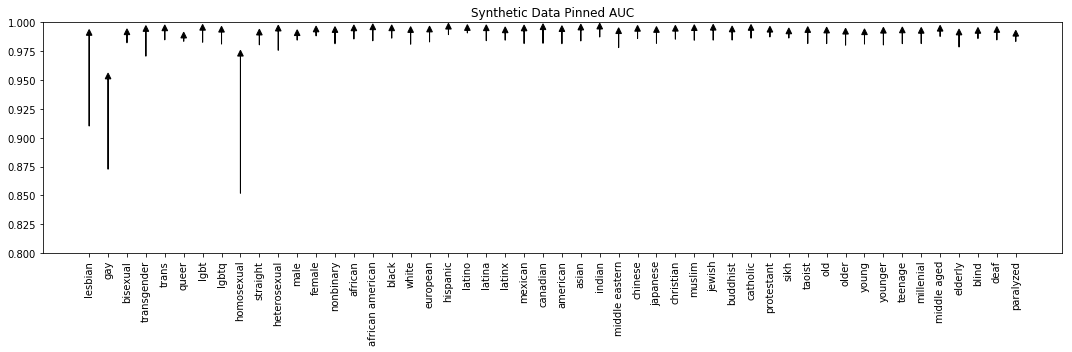

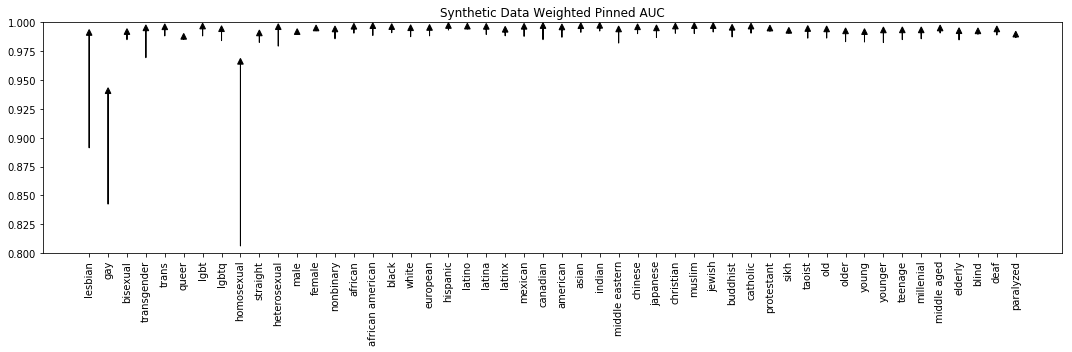

In [358]:
scatterplot(madlibs_results, 'TOXICITY_V1_pinned_auc', 'TOXICITY_V6_pinned_auc', 'Synthetic Data Pinned AUC')
scatterplot(madlibs_results, 'TOXICITY_V1_weighted_pinned_auc', 'TOXICITY_V6_weighted_pinned_auc', 'Synthetic Data Weighted Pinned AUC')

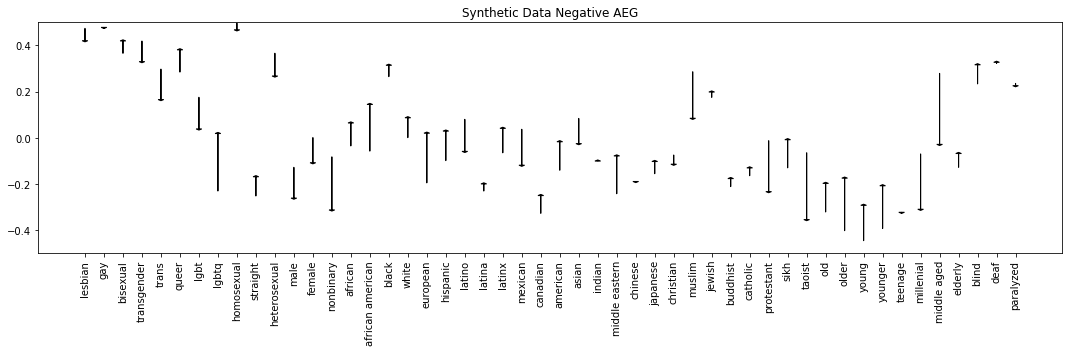

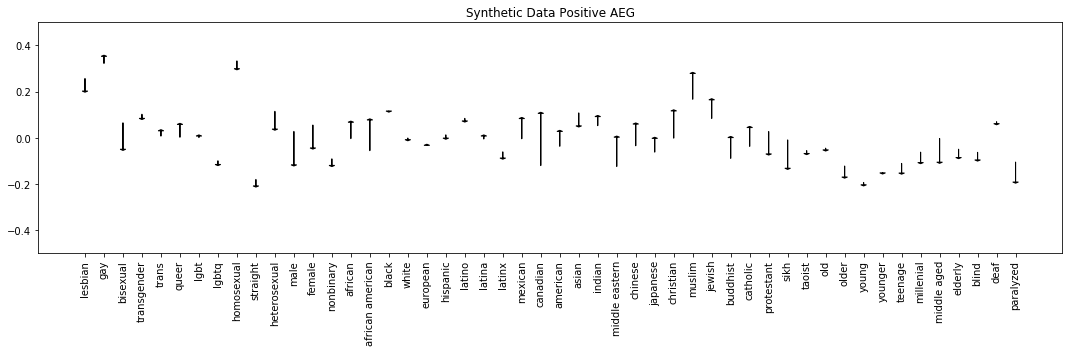

In [359]:
scatterplot(madlibs_results, 'TOXICITY_V1_negative_aeg', 'TOXICITY_V6_negative_aeg', 'Synthetic Data Negative AEG', ylim=(-0.5,0.5))
scatterplot(madlibs_results, 'TOXICITY_V1_positive_aeg', 'TOXICITY_V6_positive_aeg', 'Synthetic Data Positive AEG', ylim=(-0.5,0.5))

In [360]:
# REAL DATA

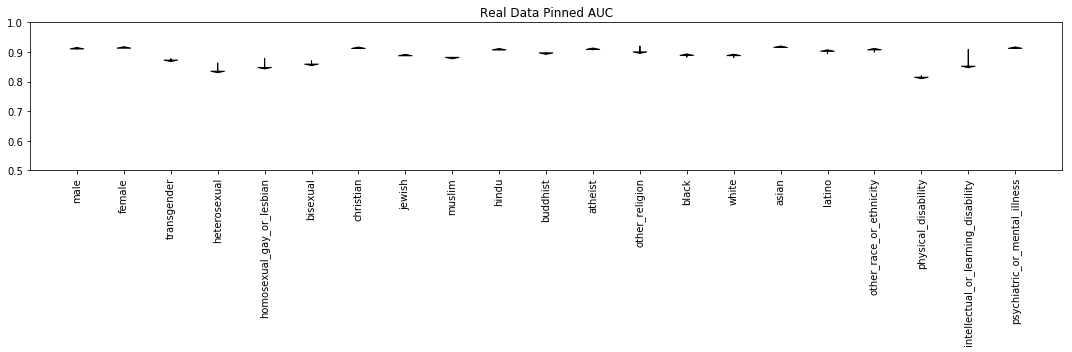

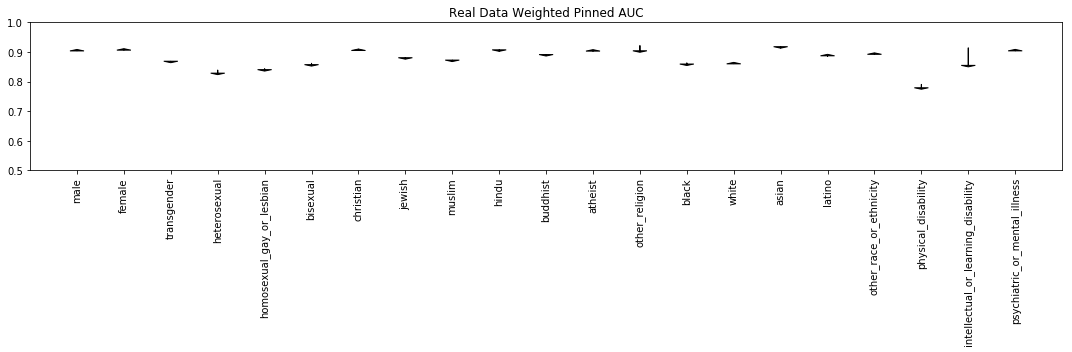

In [361]:
scatterplot(real_data_results, 'TOXICITY_V1_pinned_auc', 'TOXICITY_V6_pinned_auc', 'Real Data Pinned AUC', ylim=(0.5,1.0))
scatterplot(real_data_results, 'TOXICITY_V1_weighted_pinned_auc', 'TOXICITY_V6_weighted_pinned_auc', 'Real Data Weighted Pinned AUC', ylim=(0.5,1.0))

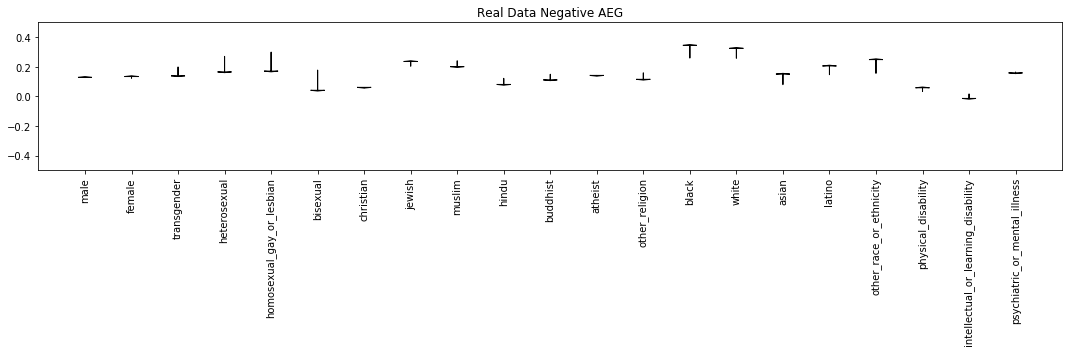

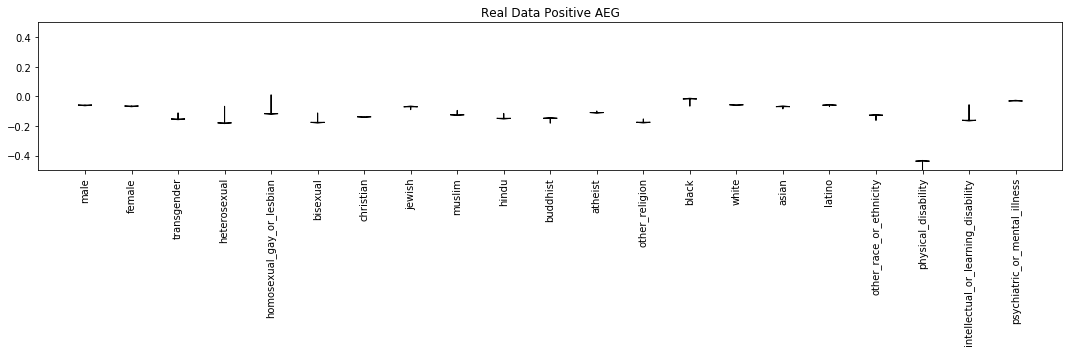

In [362]:
scatterplot(real_data_results, 'TOXICITY_V1_negative_aeg', 'TOXICITY_V6_negative_aeg', 'Real Data Negative AEG', ylim=(-0.5,0.5))
scatterplot(real_data_results, 'TOXICITY_V1_positive_aeg', 'TOXICITY_V6_positive_aeg', 'Real Data Positive AEG', ylim=(-0.5,0.5))

In [363]:
out = madlibs_results[['subgroup', 'TOXICITY_V1_pinned_auc', 'TOXICITY_V6_pinned_auc', 'TOXICITY_V1_weighted_pinned_auc', 'TOXICITY_V6_weighted_pinned_auc', 'TOXICITY_V1_negative_aeg', 'TOXICITY_V6_negative_aeg', 'TOXICITY_V1_positive_aeg', 'TOXICITY_V6_positive_aeg']]
out.to_csv('eval_datasets/bias_madlibs_77k_scored_prod_models_metrics.csv')

In [364]:
out_real = real_data_results[['subgroup', 'TOXICITY_V1_pinned_auc', 'TOXICITY_V6_pinned_auc', 'TOXICITY_V1_weighted_pinned_auc', 'TOXICITY_V6_weighted_pinned_auc', 'TOXICITY_V1_negative_aeg', 'TOXICITY_V6_negative_aeg', 'TOXICITY_V1_positive_aeg', 'TOXICITY_V6_positive_aeg']]
out_real.to_csv('eval_datasets/identity_labeled_metrics.csv')